<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools/notebooks/JARVIS_Optoelectronics_Computational_screening_of_high_performance_optoelectronic_materials_using_OptB88vdW_and_TB_mBJ_formalisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:
[Computational screening of high-performance optoelectronic materials using OptB88vdW and TB-mBJ formalisms](https://www.nature.com/articles/sdata201882)

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 962 kB 16.8 MB/s 
     |████████████████████████████████| 325 kB 29.7 MB/s 


In [2]:
!wget https://raw.githubusercontent.com/knc6/jarvis-tools-notebooks/master/jarvis-tools-notebooks/additional_data/loptics_exp.csv

--2022-05-23 02:36:15--  https://raw.githubusercontent.com/knc6/jarvis-tools-notebooks/master/jarvis-tools-notebooks/additional_data/loptics_exp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1987 (1.9K) [text/plain]
Saving to: ‘loptics_exp.csv’

loptics_exp.csv     100%[===================>]   1.94K  --.-KB/s    in 0s      

2022-05-23 02:36:15 (54.4 MB/s) - ‘loptics_exp.csv’ saved [1987/1987]



In [4]:
import pandas as pd
df=pd.read_csv('loptics_exp.csv')

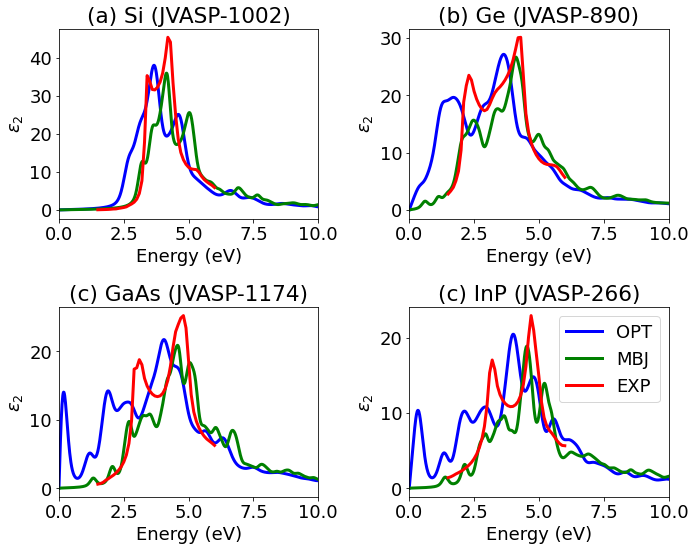

In [40]:
from jarvis.db.webpages import Webpage
from jarvis.db.figshare import data
from jarvis.core.spectrum import Spectrum
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(2,2)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))


plt.subplot(the_grid[0, 0])
w=Webpage(jid='JVASP-1002')
mbj_dielectric=w.get_dft_mbj_dielectric_function()
# s = Spectrum(x=mbj_dielectric['energies'],y=mbj_dielectric['imag_xx'])
# interp = np.array(s.get_interpolated_values(new_dist=new_dist))
opt_dielectric=w.get_dft_semilocal_dielectric_function()
plt.plot(opt_dielectric['energies'],opt_dielectric['imag_xx'],c='b',label='OPT',linewidth=3)
plt.plot(mbj_dielectric['energies'],mbj_dielectric['imag_xx'],c='g',label='MBJ',linewidth=3)
plt.plot(df['Si-En'],df['Si-Eps'],'-',label='EXP',c='red',linewidth=3)
plt.xlim([0,10])
plt.xlabel('Energy (eV)')
plt.ylabel('$\epsilon_2$')
plt.title('(a) Si (JVASP-1002)')



plt.subplot(the_grid[0, 1])
w=Webpage(jid='JVASP-890')
mbj_dielectric=w.get_dft_mbj_dielectric_function()
# s = Spectrum(x=mbj_dielectric['energies'],y=mbj_dielectric['imag_xx'])
# interp = np.array(s.get_interpolated_values(new_dist=new_dist))
opt_dielectric=w.get_dft_semilocal_dielectric_function()
plt.plot(opt_dielectric['energies'],opt_dielectric['imag_xx'],c='b',label='OPT',linewidth=3)
plt.plot(mbj_dielectric['energies'],mbj_dielectric['imag_xx'],c='g',label='MBJ',linewidth=3)
plt.plot(df['Ge-En'],df['Ge-Eps'],'-',label='EXP',c='red',linewidth=3)
plt.xlim([0,10])
plt.title('(b) Ge (JVASP-890)')
plt.xlabel('Energy (eV)')
plt.ylabel('$\epsilon_2$')


plt.subplot(the_grid[1, 0])
w=Webpage(jid='JVASP-1174')
mbj_dielectric=w.get_dft_mbj_dielectric_function()
# s = Spectrum(x=mbj_dielectric['energies'],y=mbj_dielectric['imag_xx'])
# interp = np.array(s.get_interpolated_values(new_dist=new_dist))
opt_dielectric=w.get_dft_semilocal_dielectric_function()
plt.plot(opt_dielectric['energies'],opt_dielectric['imag_xx'],c='b',label='OPT',linewidth=3)
plt.plot(mbj_dielectric['energies'],mbj_dielectric['imag_xx'],c='g',label='MBJ',linewidth=3)
plt.plot(df['GaAs-En'],df['GaAs-Eps'],'-',label='EXP',c='red',linewidth=3)
plt.xlim([0,10])
plt.title('(c) GaAs (JVASP-1174)')
plt.xlabel('Energy (eV)')
plt.ylabel('$\epsilon_2$')


plt.subplot(the_grid[1, 1])
w=Webpage(jid='JVASP-266')
mbj_dielectric=w.get_dft_mbj_dielectric_function()
# s = Spectrum(x=mbj_dielectric['energies'],y=mbj_dielectric['imag_xx'])
# interp = np.array(s.get_interpolated_values(new_dist=new_dist))
opt_dielectric=w.get_dft_semilocal_dielectric_function()
plt.plot(opt_dielectric['energies'],opt_dielectric['imag_xx'],c='b',label='OPT',linewidth=3)
plt.plot(mbj_dielectric['energies'],mbj_dielectric['imag_xx'],c='g',label='MBJ',linewidth=3)
plt.plot(df['InP-En'],df['InP-Eps'],'-',label='EXP',c='red',linewidth=3)
plt.xlim([0,10])
plt.legend()
plt.title('(c) InP (JVASP-266)')
plt.xlabel('Energy (eV)')
plt.ylabel('$\epsilon_2$')



plt.tight_layout()

In [25]:
dft_3d=pd.DataFrame(data('dft_3d'))

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:01<00:00, 17.2MiB/s]


Loading the zipfile...
Loading completed.


In [35]:
import numpy as np
dft_3d_eps=dft_3d[['optb88vdw_bandgap','mbj_bandgap','epsx','epsy','epsz','mepsx','mepsy','mepsz']].replace('na',np.nan).dropna()

In [43]:
dft_3d_eps

,optb88vdw_bandgap,mbj_bandgap,epsx,epsy,epsz,mepsx,mepsy,mepsz
4,0.000,0.000,47.0290,47.0290,28.1625,79.0710,78.7247,18.0060
6,0.000,0.000,117.2598,117.2598,117.2598,198.1112,196.7643,197.8337
16,0.000,0.000,75.5312,75.5312,39.8148,151.5199,150.9435,71.2467
24,1.681,2.276,9.8497,9.8497,9.8497,7.9639,7.9639,7.9639
25,0.016,0.256,8.7742,8.7742,8.7742,8.4281,8.4281,8.4281
...,...,...,...,...,...,...,...,...
55541,0.000,0.000,31.0715,31.0715,31.0715,33.1553,33.1553,33.1553
55637,0.000,0.000,19.5700,19.5700,9.7161,21.3805,17.9432,6.8204
55651,0.000,0.000,25.6930,25.6930,25.6930,40.7587,40.7587,40.7587
55652,0.546,1.197,10.8332,3.7510,8.1999,8.3801,3.1019,6.4459


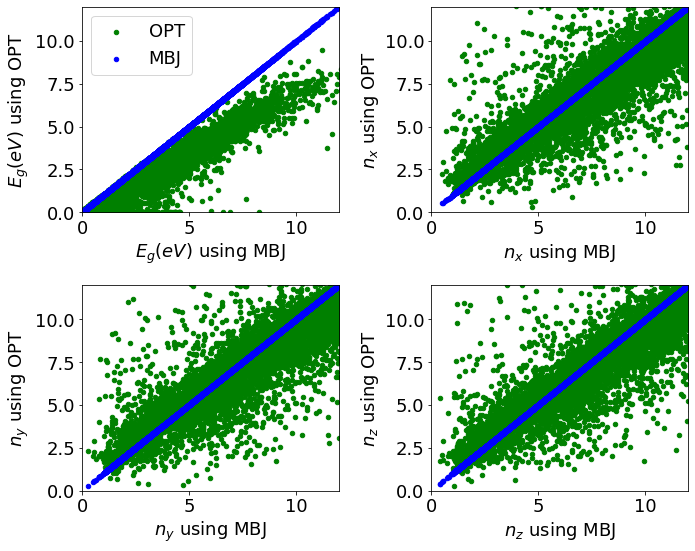

In [51]:
the_grid = GridSpec(2,2)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))


plt.subplot(the_grid[0, 0])
plt.scatter(dft_3d_eps['mbj_bandgap'],dft_3d_eps['optb88vdw_bandgap'],s=20,c='g',label='OPT')
plt.scatter(dft_3d_eps['mbj_bandgap'],dft_3d_eps['mbj_bandgap'],s=20,c='b',label='MBJ')
plt.xlim([0,12])
plt.ylim([0,12])
plt.legend()
plt.xlabel('$E_g(eV)$ using MBJ')
plt.ylabel('$E_g(eV)$ using OPT')


plt.subplot(the_grid[0, 1])
plt.scatter(np.sqrt(dft_3d_eps['mepsx']),np.sqrt(dft_3d_eps['epsx']),s=20,c='g',label='OPT')
plt.scatter(np.sqrt(dft_3d_eps['mepsx']),np.sqrt(dft_3d_eps['mepsx']),s=20,c='b',label='MBJ')
plt.xlim([0,12])
plt.ylim([0,12])
#plt.legend()
plt.xlabel('$n_x$ using MBJ')
plt.ylabel('$n_x$ using OPT')


plt.subplot(the_grid[1, 0])
plt.scatter(np.sqrt(dft_3d_eps['mepsy']),np.sqrt(dft_3d_eps['epsy']),s=20,c='g',label='OPT')
plt.scatter(np.sqrt(dft_3d_eps['mepsy']),np.sqrt(dft_3d_eps['mepsy']),s=20,c='b',label='MBJ')
plt.xlim([0,12])
plt.ylim([0,12])
#plt.legend()
plt.xlabel('$n_y$ using MBJ')
plt.ylabel('$n_y$ using OPT')


plt.subplot(the_grid[1, 1])
plt.scatter(np.sqrt(dft_3d_eps['mepsz']),np.sqrt(dft_3d_eps['epsz']),s=20,c='g',label='OPT')
plt.scatter(np.sqrt(dft_3d_eps['mepsz']),np.sqrt(dft_3d_eps['mepsz']),s=20,c='b',label='MBJ')
plt.xlim([0,12])
plt.ylim([0,12])
#plt.legend()
plt.xlabel('$n_z$ using MBJ')
plt.ylabel('$n_z$ using OPT')
plt.tight_layout()